<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

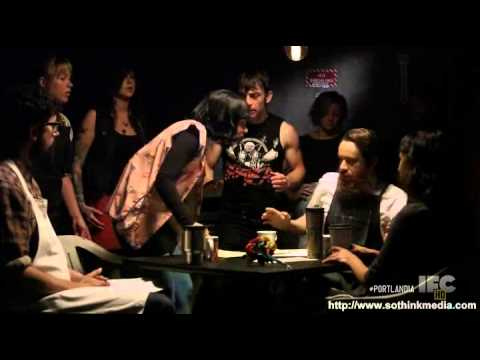

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Samue\\Documents\\Lambda School\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
# Remove unnecessary dates and text in full_review_text and star_rating 

shops['date'] = shops['full_review_text'].str.extract(r"(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)")
shops['date'] = pd.to_datetime(shops['date']) 
shops['full_review_text'] = shops['full_review_text'].str.replace('(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)', '')

shops['rating'] = shops['star_rating'].copy().map(lambda x: str(x)[:-12])
shops = shops.drop(columns= 'star_rating')
shops.head()

,coffee_shop_name,full_review_text,date,rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,2016-11-25,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",2016-12-02,4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,2016-11-30,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2016-11-25,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,2016-12-03,4.0


In [3]:
shops['rating'] = shops['rating'].astype(float)

In [37]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
Caffé Medici                            143
Apanas Coffee & Beer                    136
Radio Coffee & Beer                     100
Seventh Flag Coffee Co                  100
Thunderbird Coffee                      100
Vintage Heart Coffee                    100
Mary’s Cafe                             100
Dominican Joe                           100
La Patisserie                           100
Pacha                                   100
The Hideout Coffeehouse                 100
Summermoon Coffee Bar                   100
Quack’s 43rd Street Bakery              100
Arturo’s Underground Cafe               100
Caffe Medici                            100
Bennu Coffee                            100
Picnik Austin                           100
Live Oak Market                 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [9]:
import seaborn as sns

In [10]:
myShop = shops[shops['coffee_shop_name'] == 'Genuine Joe ']
myShop.head()

,coffee_shop_name,full_review_text,date,rating
5241,Genuine Joe,Seriously the best Iced Chai in Austin. I a...,2016-11-27,5.0
5242,Genuine Joe,Room nice. Plain coffee meh. They have int...,2016-11-06,4.0
5243,Genuine Joe,1 check-in The artist group I belong to had ...,2016-08-25,4.0
5244,Genuine Joe,1 check-in I came here because it was the hi...,2016-06-09,4.0
5245,Genuine Joe,Hands down my favorite coffee shop in Austin...,2016-11-23,5.0


In [11]:
myShop['rating'].value_counts()

5.0    40
4.0    35
3.0    11
2.0     8
1.0     6
Name: rating, dtype: int64

C:\Users\Samue\Anaconda3\envs\DS-U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


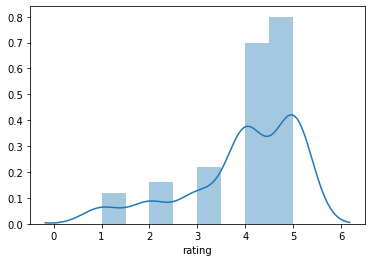

In [12]:
sns.distplot(myShop['rating']);

In [13]:
import numpy as np

In [14]:
# Found that the coffee shop has
# an average rating of 4.
print(np.mean(myShop['rating']))

3.95


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [15]:
myShop['rating'].value_counts(normalize=True)

5.0    0.40
4.0    0.35
3.0    0.11
2.0    0.08
1.0    0.06
Name: rating, dtype: float64

In [16]:
# Borrowing from lecture

In [17]:
import re

In [18]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [19]:
myShop['tokens'] = myShop['full_review_text'].apply(tokenize)

C:\Users\Samue\Anaconda3\envs\DS-U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
myShop['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(20)

[('the', 446),
 ('and', 331),
 ('a', 283),
 ('i', 254),
 ('to', 223),
 ('of', 161),
 ('is', 156),
 ('in', 135),
 ('coffee', 134),
 ('it', 120),
 ('for', 110),
 ('that', 95),
 ('was', 95),
 ('you', 89),
 ('they', 84),
 ('this', 82),
 ('have', 75),
 ('but', 73),
 ('place', 72),
 ('with', 66)]

In [21]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [22]:
wc = count(myShop['tokens'])

In [23]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
40,the,93,446,1.0,0.046222,0.046222,0.93
34,and,92,331,2.0,0.034304,0.080526,0.92
36,a,84,283,3.0,0.029329,0.109856,0.84
42,i,78,254,4.0,0.026324,0.136180,0.78
6,to,71,223,5.0,0.023111,0.159291,0.71


In [24]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [25]:
nlp.Defaults.stop_words |= {"the", 'I', 'coffee', 'i', 'Coffee', 'it', "it's", 'it.', 
                            'the', 'this', 'a', 'A', ' ', '  ', ' the ', '1', '_', '.',
                            '-', 'genuine ', 'place', 'place', 'they', 'austin', 'shop',
                            'people', 'check-in', "don't", "I've", "i've", "I'm", "i'm",
                            'check-ins', 'like', 'genuine', 'work', 'room', 'parking',
                           'got', 'rooms', 'plenty', 'staff'}

In [26]:
nlp.vocab.add_flag(lambda s: s.lower() in spacy.lang.en.stop_words.STOP_WORDS, spacy.attrs.IS_STOP)

12

In [27]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(myShop['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

myShop['tokens'] = tokens

C:\Users\Samue\Anaconda3\envs\DS-U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
wc = count(myShop['tokens'])
wc['word'].head(8)

287      good
24      great
324      love
15       chai
106    pretty
129      cool
19       best
233      nice
Name: word, dtype: object

In [29]:
import squarify
import matplotlib.pyplot as plt

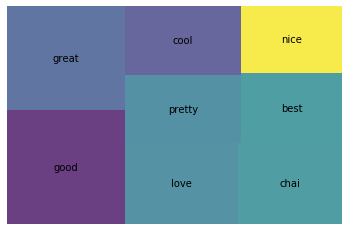

In [30]:
wc_top8 = wc[wc['rank'] <= 8]

squarify.plot(sizes=wc_top8['pct_total'], label=wc_top8['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [31]:
# Taking a Look at another shop

In [48]:
otherShops = shops[shops['coffee_shop_name'] != 'Genuine Joe ']
otherShops.head(20)

,coffee_shop_name,full_review_text,date,rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,2016-11-25,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",2016-12-02,4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,2016-11-30,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2016-11-25,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,2016-12-03,4.0
5,The Factory - Cafe With a Soul,1 check-in Very cute cafe! I think from the ...,2016-11-20,4.0
6,The Factory - Cafe With a Soul,"2 check-ins Listed in ""Nuptial Coffee Bliss!...",2016-10-27,4.0
7,The Factory - Cafe With a Soul,2 check-ins Love this place! 5 stars for cl...,2016-11-02,5.0
8,The Factory - Cafe With a Soul,"1 check-in Ok, let's try this approach... P...",2016-10-25,3.0
9,The Factory - Cafe With a Soul,3 check-ins This place has been shown on my ...,2016-11-10,5.0


In [40]:
import numpy as np

In [49]:
np.mean(otherShops['rating'])

4.1720329962746145

In [50]:
otherShops['tokens'] = otherShops['full_review_text'].apply(tokenize)
otherShops['tokens'].apply(lambda x: word_counts.update(x))
wc2 = count(otherShops['tokens'])
wc.head(8)

C:\Users\Samue\Anaconda3\envs\DS-U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
287,good,25,32,1.0,0.007788,0.007788,0.25
24,great,26,29,2.0,0.007058,0.014845,0.26
324,love,20,22,3.0,0.005354,0.020200,0.20
15,chai,14,20,4.0,0.004867,0.025067,0.14
106,pretty,15,19,5.0,0.004624,0.029691,0.15
129,cool,14,19,6.0,0.004624,0.034315,0.14
19,best,15,17,7.0,0.004137,0.038452,0.15
233,nice,15,16,8.0,0.003894,0.042346,0.15


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

